<b>Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
path = '/content/drive/MyDrive/Potatos Disease Classification'

<b>Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

<b>Setting Some Parameters

In [3]:
img_size = 256
batch_size = 32 
epochs = 30
channels = 3

<b>Loading & Visualizing Dataset

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    shuffle=True,
    image_size = (img_size,img_size),
    batch_size = batch_size
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 1 1 1 0 1 2 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0]


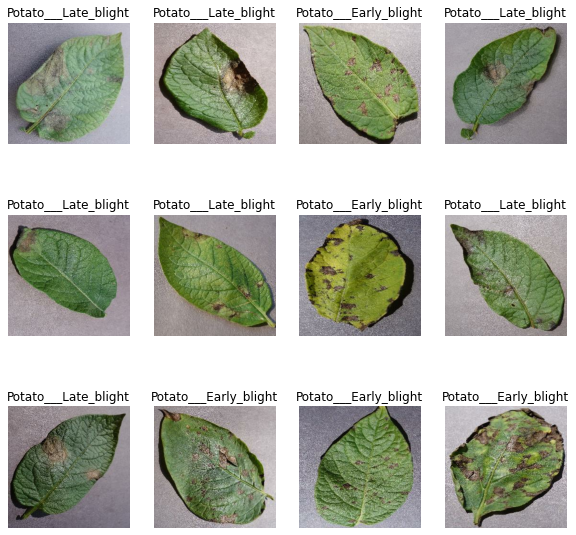

In [8]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

<b>Splitting Data Into Test & Train

In [9]:
len(dataset)

68

In [10]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [11]:
train_ds = dataset.take(54)
len(train_ds)

54

In [12]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
# def splitting_dataset(ds, train_split=o.8, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size=10000):
    
#     ds_size = len(ds)
#     if shuffle:
#         ds = ds.shuffle(shuffle_size, seed=12)

#     train_size = int(train_split * ds_size)
#     val_size = int(val_split * ds_size)
    
#     train_ds = ds.take(train_size)
#     val_ds = ds.skip(train_size).take(val_size)
#     test_ds = ds.skip(train_size).skip(val_size)
    
#     return train_ds, val_ds, test_ds

In [16]:
# train_ds, val_ds, test_ds = splitting_dataset(dataset)

<b>Optimizing Train Test and Validation Sets

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<b>Creating Some Preprocessing Layers

In [18]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_size,img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [19]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

<b>Building Convolutional Model

In [20]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(batch_size, img_size, img_size, channels)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.build(input_shape=(batch_size, img_size, img_size, channels))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

<b>Compiling Model & Fitting Train Set

In [22]:
model.compile(optimizer='adam', 
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy']
)

In [23]:
history = model.fit(train_ds,
                    epochs = epochs,
                    batch_size = batch_size,
                    verbose=1,
                    validation_data = val_ds
)

Epoch 1/30
54/54 [==============================] - 241s 548ms/step - loss: 0.9054 - accuracy: 0.5046 - val_loss: 0.9016 - val_accuracy: 0.5833
Epoch 2/30
54/54 [==============================] - 7s 125ms/step - loss: 0.7024 - accuracy: 0.7008 - val_loss: 0.5615 - val_accuracy: 0.7188
Epoch 3/30
54/54 [==============================] - 7s 125ms/step - loss: 0.5109 - accuracy: 0.7749 - val_loss: 0.3844 - val_accuracy: 0.8594
Epoch 4/30
54/54 [==============================] - 7s 124ms/step - loss: 0.3665 - accuracy: 0.8530 - val_loss: 0.2785 - val_accuracy: 0.8906
Epoch 5/30
54/54 [==============================] - 7s 123ms/step - loss: 0.3276 - accuracy: 0.8681 - val_loss: 0.2970 - val_accuracy: 0.9062
Epoch 6/30
54/54 [==============================] - 7s 123ms/step - loss: 0.2725 - accuracy: 0.8866 - val_loss: 0.3071 - val_accuracy: 0.8802
Epoch 7/30
54/54 [==============================] - 7s 122ms/step - loss: 0.2149 - accuracy: 0.9184 - val_loss: 0.3969 - val_accuracy: 0.8490
Epoc

<b>Accuracy & Loss Graphs

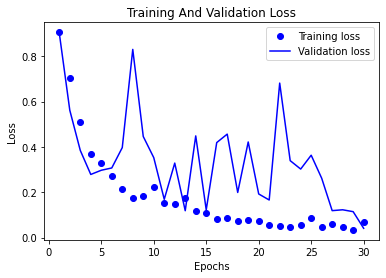

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training And Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

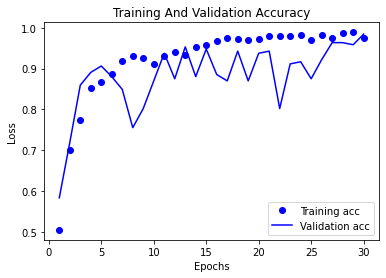

In [25]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training And Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<b>Test Evaluations

In [26]:
import numpy as np
accuracy_np = np.asarray(acc)

In [27]:
round(accuracy_np.mean()*100,2)

92.18

In [28]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 7s 89ms/step - loss: 0.0492 - accuracy: 0.9828


First Image To Predict
Actual Label Of First Image:  Potato___Late_blight
Predicted Label Of First Image:  Potato___Late_blight


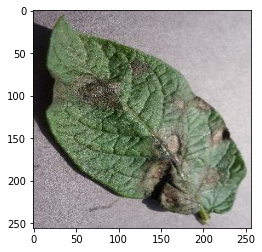

In [45]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print('First Image To Predict')
    plt.imshow(first_image)
    print('Actual Label Of First Image: ', class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print('Predicted Label Of First Image: ',class_names[np.argmax(batch_prediction[0])])